<a href="https://colab.research.google.com/github/mretana1999/Intro-to-AI/blob/main/assignment-4/AI_a4_mretanarodri2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
##Intro to Artificial Intelligence - COP 4630
---

###Assignment A4: Flower classification using machine learning techniques

###** - Mauricio Retana**

###** - Juan Pablo Idrovo**

###** - Reynaldo Williams**


###**Professor - Dr Marques**


### Due Date - July 25, 2021

### Code used as a reference and starting point: Code from the Prof. Oge Marques URL: https://colab.research.google.com/drive/1Mz6ZUi2VXCsQCCZ0GiwS3YNUthcrPslz?usp=sharing&authuser=1  

# Introduction:

The database consists in 150 examples of 3 different flower sets This is a simple example of a 3-class classifier using the Fisher's Iris dataset. The types of plants are 50 setosa, 50 virginica, and 50 versicolor. We will examine the machine learning workflow by putting in practice its steps. The analysis, the setting up the data, the training, the testing model, and finally, the improvement of the accuracy are the 5 steps for this assignment of artificial intelligence. The importance of each solution is shown by how it is made, from the design to the actual documentation of the program. Fishers Iris flower database as well it is made, requires certain organization and analysis for a more efficient code. In this example, we must convert the string values of the class column to integer numbers because of the algorithm. In the documentation below we will see the details.

![picture](https://drive.google.com/uc?export=view&id=12nmRddY8G973TQF0Z9T5IRzI1f2E5lsa)

## Flower classification using machine learning techniques
This is a simple example of a 3-class classifier using the Fisher's Iris dataset.


Useful references and sources:

- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://www.kaggle.com/uciml/iris
- http://archive.ics.uci.edu/ml/datasets/Iris/
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html 
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html 
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html

## Setup

We provide the initial setup of the notebook. In this section we import the necessary libraries so you can build your model.

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load

## Part 1. Load the data

The first step is to load the necessary data. 

Use the command `read_csv` from pandas library to load the Iris dataset. After loading the data into a dataframe, show the top of the dataset. 

The dataset file URL is https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.

In [ ]:
# load the data
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Part 2. Explore and visualize the data



After loading the dataset into a dataframe in memory, the next step is to perform an exploratory data analysis. The objective of the EDA is to discover as much information as possible about the dataset. 

The `describe()` method is a good starting point. The `describe()` method prints statistics of the dataset, like mean, standard deviation, etc.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A very important tool in exploratory data analysis is data visualization, which helps us to gain insights about the dataset. 

### TODO 2

Write code to generate a pair plot for the Iris dataset.

The next step in our process will be to write some code that will allow us to generate a pair plot for the Iris
dataset. The seaborn library has an amazingly useful function for this exact purpose and it is what we will be
utilizing today. We will be using the pairplot() function which will allow us to generate an insightful pairplot.

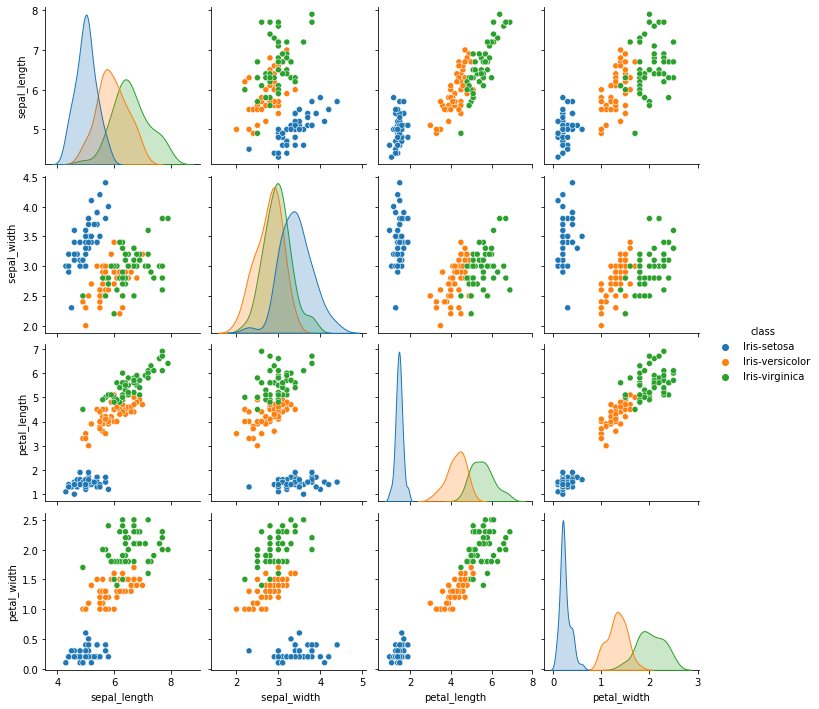

In [ ]:
# ENTER YOUR CODE HERE
sns.pairplot(iris, hue = 'class')


#### Notes:

---
We found it optimal to color the plot on the basis of class to give more insight into the information we are seeing. So on our plot there are different colors / hues for the three different classes of iris (iris versicolor,
iris setosa, and iris virginica)

## Part 3. Preprocess the data

Frequently, the dataset collected from databases, files or scraping the internet is not ready
to be consumed by a machine learning algorithm. 

In most cases, the dataset needs some kind of preparation or preprocessing before being used as input to a machine learning algorithm. 

In this case, we convert the string values of the class column to integer numbers because the algorithm we are going to use does not process string values.

#### Notes:

---

Our textbook, Grokking Artificial Intelligence Algorithms, referred to this step as Clean and Wrangle, stating that 'real-world data is never ideal to work with'.

In [ ]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris['class_encod'] = iris['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
iris['class_encod'].unique()

array([0, 1, 2])

In [ ]:
y = iris[['class_encod']] # target attributes 
X = iris.iloc[:, 0:4] # input attributes
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,class_encod
0,0
1,0
2,0
3,0
4,0


### TODO 3
Write code to normalize the features of the iris dataset so that all attributes fit within the [0..1] range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X.to_numpy())
X = pd.DataFrame(X, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## Part 4. Select an algorithm and train the model

After exploring and preprocessing our data we can build our machine learning model to classify Iris specimens. 

The method `train_test_split()` will split the `X` and `y` dataframes in training data and test data.


In [ ]:
import random
random.seed(42) # for reproducibility purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

np.shape(y_train)

(105, 1)

### 4.1 K-nearest-neighbors (KNN) classifier

Let's use `X_train` and `y_train` to build a KNN classifier, using the `KNeighborsClassifier` class provided by scikit-learn. 

Because the machine learning algorithm is already implemented by the library, all we have to do is call the method `fit()` passing the `X_train` and `y_train` datasets as arguments.

In [ ]:
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Once the model is built, we can use the `predict()` method to calculate the predicted category of a instance. 

In this case, we want to predict the class of the first 10 lines of the `X_test` dataset. The return is an array containing the estimated categories.

In [ ]:
m.predict(X_test.iloc[0:10])

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [ ]:
y_test[0:10]

,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


We can use methods like `score()` and `confusion_matrix()` to measure the performance of our model. 

We see that the accuracy of our model is very close to 100%, which means that the model predicted correctly almost all cases of the test dataset. 

In [ ]:
m.score(X_test, y_test)

0.9777777777777777

A confusion matrix shows where the errors occurred, i.e., which classes were misclassified. 

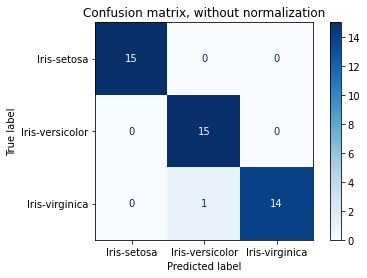

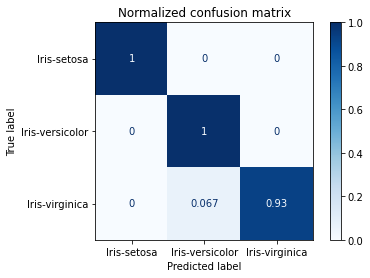

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(m, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### Save the model for later use

We might want to save our model for later use. 

For example, we could embed our model into a webservice or mobile application. So we use the method `dump()` from the joblib package to save the model to a file.

In [ ]:
dump(m, 'iris-classifier.dmp')

['iris-classifier.dmp']

In [ ]:
ic_knn = load('iris-classifier.dmp')
confusion_matrix(y_test, ic_knn.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

### 4.2 Decision tree classifier


### TODO 4

Write code to build a decision tree classifier, using the `DecisionTreeClassifier` class provided by scikit-learn. 

Similarly to 4.1 above, your code should build, train, and test the classifier, compute its accuracy, display the confusion matrices, save the model to a file for later use, load it from file and confirm that it's working.


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
clf.predict(X_test.iloc[0:10])

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [ ]:
y_test[0:10]

,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


In [ ]:
clf.score(X_test, y_test)

0.9777777777777777

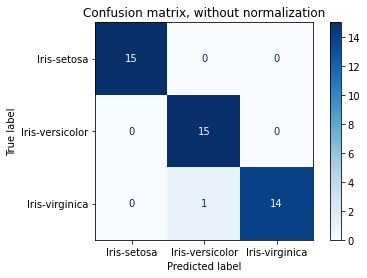

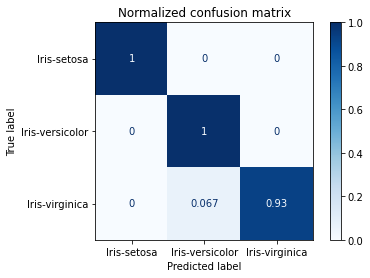

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

[Text(334.8, 587.0880000000001, 'petal_width <= 0.292\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = Iris-setosa'),
 Text(283.2923076923077, 456.624, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Iris-setosa'),
 Text(386.3076923076923, 456.624, 'petal_width <= 0.688\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = Iris-versicolor'),
 Text(206.03076923076924, 326.1600000000001, 'petal_length <= 0.669\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]\nclass = Iris-versicolor'),
 Text(103.01538461538462, 195.69600000000003, 'petal_width <= 0.646\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = Iris-versicolor'),
 Text(51.50769230769231, 65.23200000000008, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(154.52307692307693, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(309.04615384615386, 195.69600000000003, 'petal_width <= 0.604\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nc

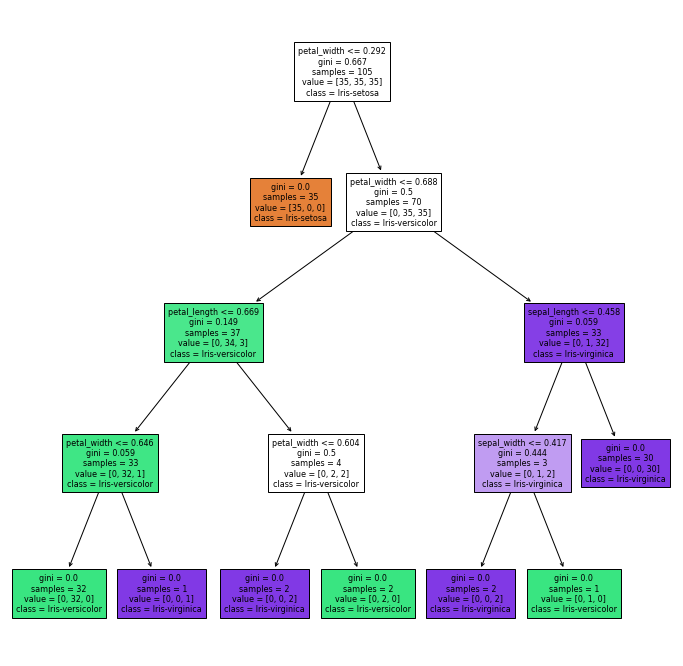

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf,feature_names=X.columns, class_names=iris['class'].unique(),filled=True, fontsize=8)

In [ ]:
dump(clf, 'iris-tree-classifier.dmp')

['iris-tree-classifier.dmp']

In [ ]:
ic = load('iris-tree-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

### Experimenting with training and testing datasets

Per our class textbook, an 80/20 split for training and testing data is usually done. "Training and testing data are usually split 80/20, with 80% of the available data used as training data and 20% used to test the model "

In prior cases, however, we used a 70/30 split for our training and testing models. This got my group interested in seeing what the effects of different extremes of these splits may be. Also, while we know what the result of this endeavor would look like, we also wanted to see what the result of using the same data to train and test would look like

First We will start with the KNN Classifier

#### KNN Classifier

##### Baseline

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

print('\nThe accuracy of our KNN base model: ')
print(m.score(X_test, y_test))



The accuracy of our KNN base model: 
0.9777777777777777


##### 80/20 Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0, stratify=y)
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))


print('\nThe accuracy of our KNN model - (80/20): ')
print(m.score(X_test, y_test))


The accuracy of our KNN model - (80/20): 
0.9666666666666667


##### 90/10 Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0, stratify=y)
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))


print('\nThe accuracy of our KNN model - (90/10): ')
print(m.score(X_test, y_test))


The accuracy of our KNN model - (90/10): 
0.9333333333333333


##### 50/50 Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=0, stratify=y)
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))


print('\nThe accuracy of our KNN model - (50/50): ')
print(m.score(X_test, y_test))


The accuracy of our KNN model - (50/50): 
0.96


##### 10/90 Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,
                                                    random_state=0, stratify=y)
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

print('\nThe accuracy of our KNN model - (10/90): ')
print(m.score(X_test, y_test))


The accuracy of our KNN model - (10/90): 
0.8962962962962963


While we belived this small experient would give more insight into some reasonably interesting workings of machine learning algorithms, these tests were lackluster to say the least. Even with seemingly large deviations from the most ideal test split, there seemed to be a relatively neglible deviation in the results seen in the accuracy of the model. We were looking forward to then see what the results of testing the model against its own training/testing data  would be and if the incroporated algorithms would recognize such values as having no deviation and produce a high accuracy, but unfortunately we did not see such a spectable given that these algorithms were designed in such a way to not allow for a mix with a deviation of 0 and threw an error at runtime. We are hoping the result of the DTC will give a more fitting mix of results for varying values.




#### Decision Tree Classifier

##### Baseline

In [ ]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


print('\nThe accuracy of our DTC base model: ')
print(clf.score(X_test, y_test))


The accuracy of our DTC base model: 
0.9555555555555556


##### 80/20 Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0, stratify=y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print('\nThe accuracy of our DTC model - (80/20): ')
print(clf.score(X_test, y_test))


The accuracy of our DTC model - (80/20): 
0.9666666666666667


##### 90/10 Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0, stratify=y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print('\nThe accuracy of our DTC model - (90/10): ')
print(clf.score(X_test, y_test))


The accuracy of our DTC model - (90/10): 
0.9333333333333333


##### 50/50 Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=0, stratify=y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print('\nThe accuracy of our DTC model - (50/50): ')
print(clf.score(X_test, y_test))


The accuracy of our DTC model - (50/50): 
0.8933333333333333


##### 10/90 Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,
                                                    random_state=0, stratify=y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print('\nThe accuracy of our DTC model - (10/90): ')
print(clf.score(X_test, y_test))


The accuracy of our DTC model - (10/90): 
0.9555555555555556


We were once again a bit disappoointed to find that the spread amongst these values were relatively negligent and not even to warrant further reasearch. We are under the impression because this subset of information is just so small with only 150 entries, we do not see much deviation across the board and thus see somewhat consisent results based on different splits. We did find this project worthwhile regardless because the main concepts that were convered in our text were exhibited and we were able to further understand a bit more about the work that is done in regards to machine learning and some of the considerations that must be taken into account and handled prior to actually running an algorithm and while you are actually testing and training. One of the simplest of things that surprised us the most was the normalization that had to be done to put the values in a range that would work, that was not something we previously thought about and have learned the importance of through this experience. 

## CONCLUSION


### LESSONS LEARNED:

From this assignment we learned more about the machine learning workflow. As explained in Grokking AI Algorithms by Hurbans, this workflow consists of 5 steps which include collecting and understanding the data, preparing the data, training a model, testing the model, and improving accuracy. Using libraries such as Scikit Learn, Pandas, Seaborn, and Numpy simplifies most of these steps as it abstracts the process of collecting data, training, and testing the model. 

Despite of this, it is still our responsibility as programmers to understand and to prepare the data. As seen in the early steps of developing this solution, libraries such as Pandas make it easy to better visualize our data so that we can look for potential dirty data through functions such as summary. For this particular problem, the iris dataset contained clean data for every sample, however, we needed to preprocess it. In this case, we needed to MinMax scale the data, which is a strategy that converts every attribute to fall in a range between 0 and 1. This makes every different feature comparable as it makes the dataset to be consistent in format. 

After preprocessing our data, we were ready to implement the machine learning algorithms. The Scikit Learn library comes with pre-built classifiers that abstract the process of implementing and training machine learning models such as K-nearest-neighbors and Decision trees classifiers. They also allow us to easily test these models with our testing dataset and to check if we chose the correct model to solve our problem. For this particular problem, we obtained better results using the K-nearest-neighbor algorithm. This is easily checked through functions such as score and confusion matrix. 